In [4]:

#Dataset is taken from kaggle UTk face dataset

import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [6]:
images = []
ages = []
genders = []

for i in os.listdir('crop_part1/')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('crop_part1/' + i))

In [7]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,101,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
...,...,...,...
2995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,24,1
2996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,25,0
2997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,25,0
2998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,25,0


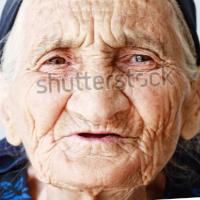

100 1


In [8]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

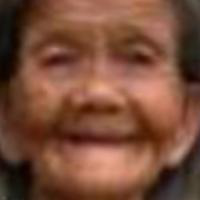

100 1


In [9]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

C:\Users\Hariharan K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

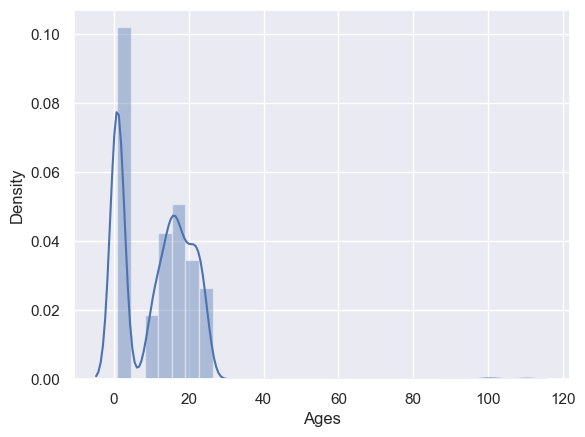

In [10]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

In [11]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

In [12]:
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,101,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
...,...,...,...
2217,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
2218,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
2219,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
2220,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1


C:\Users\Hariharan K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

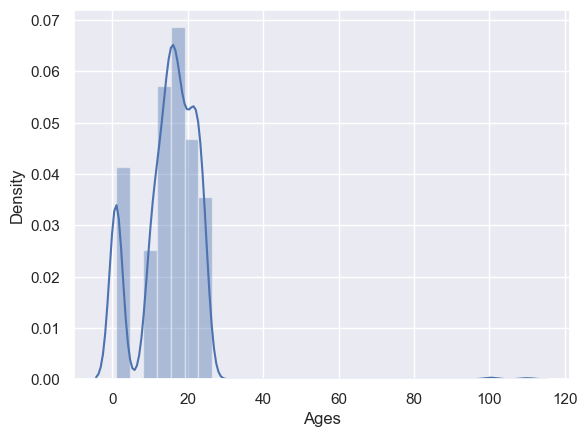

In [14]:
sns.distplot(df['Ages'],kde=True, bins=30)

In [15]:
df = df[df['Ages'] < 80]

C:\Users\Hariharan K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

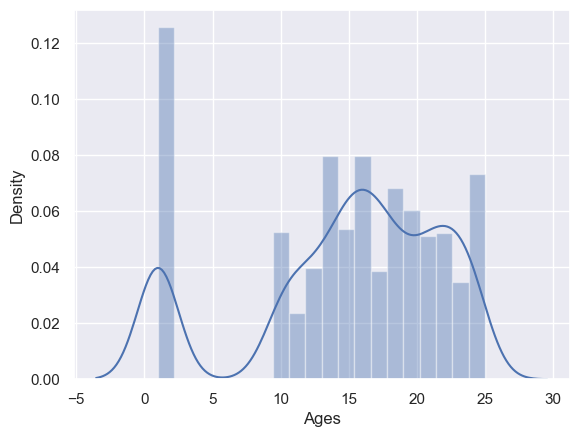

In [16]:
sns.distplot(df['Ages'],kde=True, bins=20)

In [ ]:
sns.countplot(df['Genders'])

In [ ]:
print(df)
df = df[df['Genders'].isin([0, 1])]

In [ ]:
df

C:\Users\Hariharan K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genders', ylabel='count'>

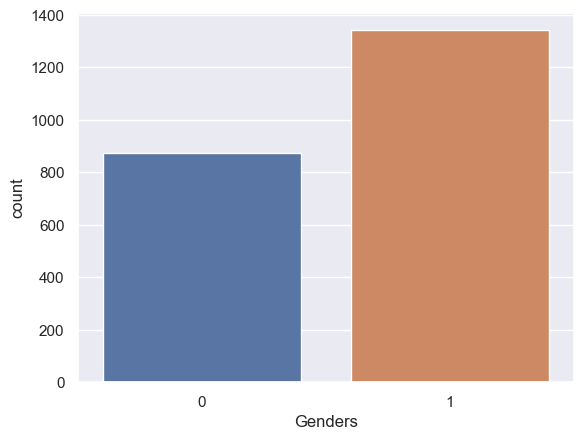

In [18]:
sns.countplot(df['Genders'])

In [19]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

C:\Users\Hariharan K\AppData\Local\Temp\ipykernel_18688\2993096863.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
C:\Users\Hariharan K\AppData\Local\Temp\ipykernel_18688\2993096863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)


In [20]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [21]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [22]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=10, shuffle=True, validation_data=test1)

Epoch 1/10
56/56 [==============================] - 83s 1s/step - loss: 74.1963 - val_loss: 37.7309
Epoch 2/10
56/56 [==============================] - 87s 2s/step - loss: 51.0716 - val_loss: 32.8448
Epoch 3/10
56/56 [==============================] - 86s 2s/step - loss: 44.7593 - val_loss: 29.5095
Epoch 4/10
56/56 [==============================] - 80s 1s/step - loss: 42.2117 - val_loss: 26.6319
Epoch 5/10
56/56 [==============================] - 76s 1s/step - loss: 41.1290 - val_loss: 29.0587
Epoch 6/10
56/56 [==============================] - 81s 1s/step - loss: 42.8559 - val_loss: 24.4282
Epoch 7/10
56/56 [==============================] - 88s 2s/step - loss: 37.5188 - val_loss: 23.8453
Epoch 8/10
56/56 [==============================] - 87s 2s/step - loss: 38.3948 - val_loss: 21.5574
Epoch 9/10
56/56 [==============================] - 83s 1s/step - loss: 38.9177 - val_loss: 23.3168
Epoch 10/10
56/56 [==============================] - 75s 1s/step - loss: 35.4575 - val_loss: 21.6761

In [25]:
from keras.preprocessing.image import ImageDataGenerator

# Reduce batch sizes
train_batch_size = 8
test_batch_size = 64

# Augmentation settings with reduced intensity
datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create flow generators with preprocessing inside flow method
train2 = datagen.flow(
    x_train_gender, y_train_gender,
    batch_size=train_batch_size,
    shuffle=True
)

test2 = test_datagen.flow(
    x_test_gender, y_test_gender,
    batch_size=test_batch_size,
    shuffle=False  # No need to shuffle test data
)

# Fit the model
history2 = genmodel.fit(
    train2,
    epochs=3,
    steps_per_epoch=len(x_train_gender) // train_batch_size,
    validation_data=test2,
    validation_steps=len(x_test_gender) // test_batch_size
)


Epoch 1/3
221/221 [==============================] - 99s 450ms/step - loss: 0.5528 - accuracy: 0.7269 - val_loss: 0.5413 - val_accuracy: 0.7422
Epoch 2/3
221/221 [==============================] - 121s 549ms/step - loss: 0.5427 - accuracy: 0.7377 - val_loss: 0.4833 - val_accuracy: 0.7630
Epoch 3/3
221/221 [==============================] - 99s 449ms/step - loss: 0.5191 - accuracy: 0.7422 - val_loss: 0.4652 - val_accuracy: 0.7708


In [31]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300,300), Image.ANTIALIAS)

1/1 [==============================] - 0s 35ms/step


C:\Users\Hariharan K\AppData\Local\Temp\ipykernel_18688\1723968635.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 34ms/step
Age: 12 
 Gender: male


C:\Users\Hariharan K\AppData\Local\Temp\ipykernel_18688\1723968635.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age+5), '\n Gender:', gender)
C:\Users\Hariharan K\AppData\Local\Temp\ipykernel_18688\1723968635.py:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return im.resize((300,300), Image.ANTIALIAS)


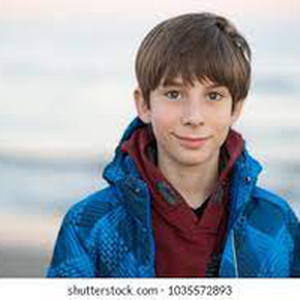

In [32]:
process_and_predict('download.jpg')

1/1 [==============================] - 0s 49ms/step


C:\Users\Hariharan K\AppData\Local\Temp\ipykernel_18688\1723968635.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 28ms/step
Age: 11 
 Gender: female


C:\Users\Hariharan K\AppData\Local\Temp\ipykernel_18688\1723968635.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age+5), '\n Gender:', gender)
C:\Users\Hariharan K\AppData\Local\Temp\ipykernel_18688\1723968635.py:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return im.resize((300,300), Image.ANTIALIAS)


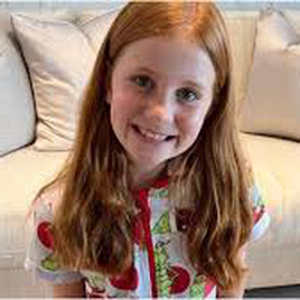

In [33]:
process_and_predict('images.jpg')